# ECE 228 Unet (Kaggle nucleus dataset)

# Python imports

In [1]:
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
%matplotlib inline  

import torch
from torch import nn
from torch.autograd import Variable
from torchvision import transforms, utils
from skimage import io, transform
from skimage.color import rgb2gray

from models import * 


# Load nucleus data

Training images shape =  (670, 3, 128, 128)
Training labels shape =  (670, 1, 128, 128)


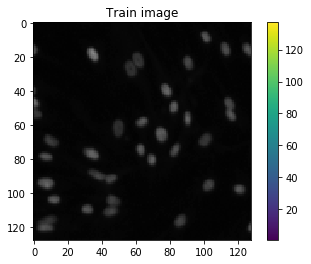

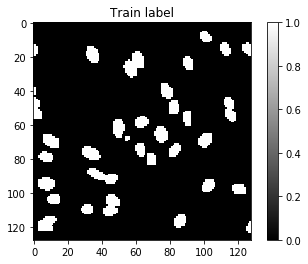

In [2]:
X_train = np.load('datasets/nucleus_train_images.npy')
X_train = (X_train/127)-1
Y_train = np.load('datasets/nucleus_train_labels.npy').astype(np.uint8)

print("Training images shape = ",X_train.shape)
print("Training labels shape = ",Y_train.shape)
original_imgs = (127*(np.moveaxis(X_train, 1, -1)+1)).astype(np.uint8)

plt.imshow(original_imgs[0])
plt.title("Train image")
plt.colorbar()
plt.show()

plt.imshow(np.squeeze(Y_train[0,:,:,:]), cmap="gray")
plt.title("Train label")
plt.colorbar()
plt.show()



# Training Methods 

In [3]:
# Prep GPU
GPU = torch.cuda.is_available()
print("GPU is {}enabled ".format(['not ', ''][GPU]))

new_size = 1024
def training(model, inputs, targets,val,val_target, epochs):
    model.train()
    
    for epoch in range(epochs): 
        num_batches = 0
        avg_loss = 0
        for (img,lbl) in zip(inputs, targets): 
            
            # prepare images and labels for pytorch (N, channels, height, width)
            img = np.expand_dims(img, axis=0)
            lbl = np.expand_dims(lbl, axis=0)

            # convert to pytorch cuda variable 
            x = Variable(torch.FloatTensor(img))
            target = Variable(torch.FloatTensor(lbl))
            if GPU: 
                x = x.cuda()
                target = target.cuda()

                
            # get output and loss 
            output = model(x)
            loss = criterion(output, target)
            
            # backpropagate 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
            avg_loss += loss.data[0]
            #print("loss = ",loss.data[0])
            
            num_batches += 1
  

        avg_loss /= num_batches
        print('epoch: ' + str(epoch) + ', train loss: ' + str(avg_loss))
        
        
        # do one random prediction 
        i = np.random.randint(0,val.shape[0])        
        val_img = val[i]
        val_img = np.expand_dims(val_img, axis=0)
        val_img = Variable(torch.FloatTensor(val_img))
        if GPU: 
            val_img = val_img.cuda()
        prediction = model(val_img)
        prediction = prediction.data.cpu().numpy()
        prediction = prediction.squeeze()
        
        
        # plot predication and real label 
        f, (ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(15,15), dpi=80)
        ax1.imshow(prediction, cmap="gray")
        ax1.set_title("Prediction")
        ax2.imshow(np.squeeze(val_target[i]), cmap="gray")
        ax2.set_title("Real label")
        plt.show()
        


GPU is enabled 


# Run Training

epoch: 0, train loss: 0.15952763585512764


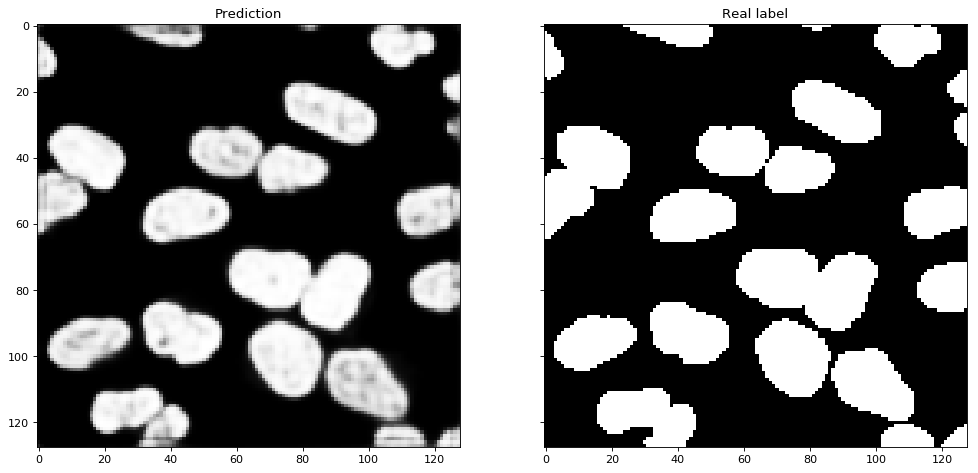

epoch: 1, train loss: 0.09507921398895335


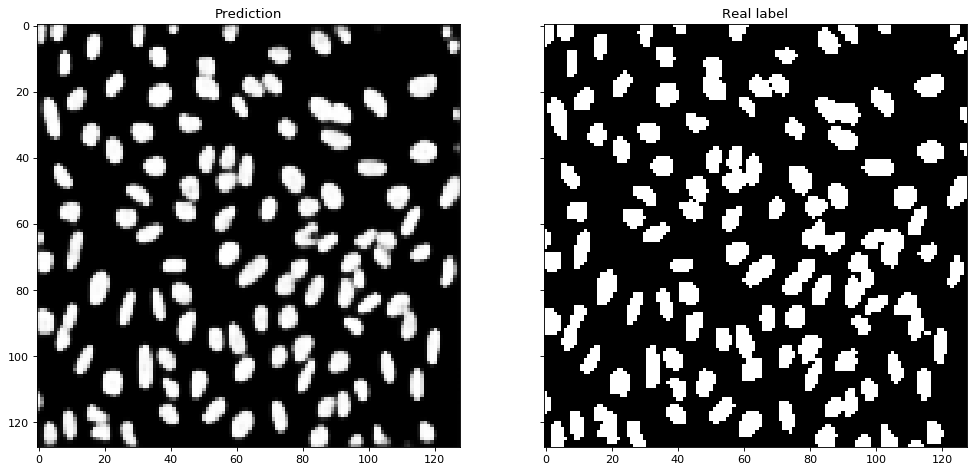

epoch: 2, train loss: 0.0865285255904518


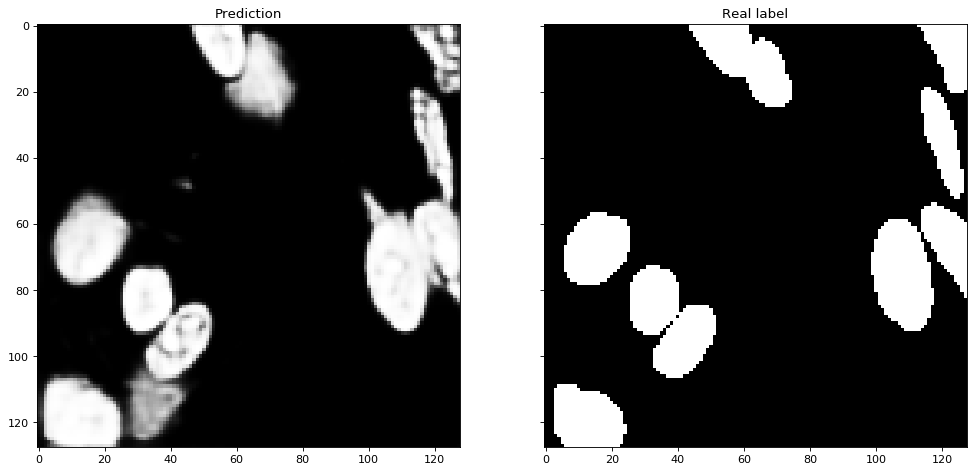

epoch: 3, train loss: 0.08323733023812634


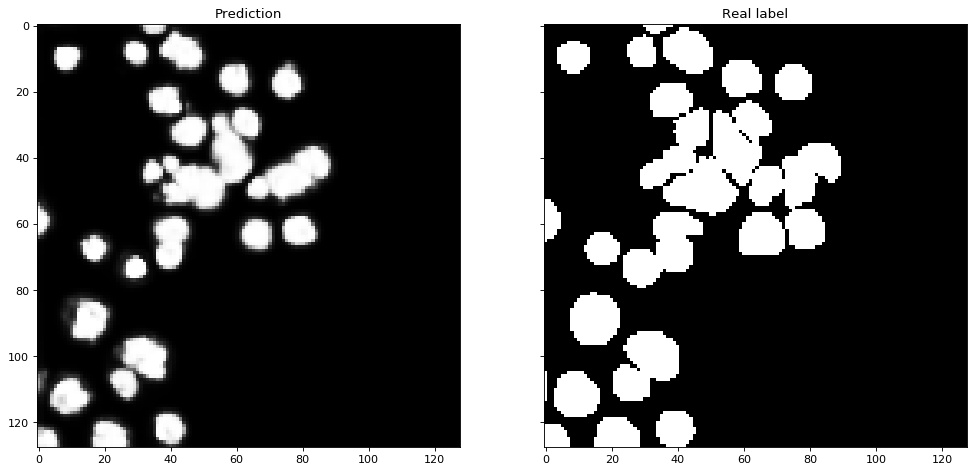

KeyboardInterrupt: 

In [4]:
#unet(n_channels, n_classes, n_filters_start=64 )
un = unet(3,1)
if GPU: 
    un = un.cuda()

optimizer = torch.optim.Adam(un.parameters(), lr=0.01)
criterion = nn.BCELoss()


# split into training and validation set 
total_train_size = X_train.shape[0]
p = np.random.permutation(total_train_size)
X_train = X_train[p]
Y_train = Y_train[p]

val_size = int(0.2*total_train_size)

X_val = X_train[:val_size]
Y_val = Y_train[:val_size]

X_train = X_train[val_size:]
Y_train = Y_train[val_size:]



# run training 
training(un,X_train, Y_train, X_val, Y_val, 100)


In [ ]:
whos
